# - 행성 운동 시뮬레이션

# 1. 패키지 불러오기

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 2. 코드 실행하기

### 2.1 함수 만들기

In [2]:
def f(r, t, G, M) :
    x, vx, y, vy = r
    r_ = (x**2 + y**2)**0.5
    return np.array([vx, -G*M*x*r_**-3, vy, -G*M*y*r_**-3])

def rk4(f, r, t, h, G, M) :
    h2 = 0.5*h
    k1 = f(r, t, G, M)
    k2 = f(r+h2*k1, t+h2, G, M)
    k3 = f(r+h2*k2, t+h2, G, M)
    k4 = f(r+h*k3, t+h, G, M)
    return r + h/6 * (k1 + 2*k2 + 2*k3 + k4)

def adaptive_rk4(f, r, t, h, G, M) :
    acc = 1e-7
    rho = 0

    while rho < 1 :
        r1 = rk4(f, rk4(f, r, t, h, G, M), t, h, G, M)
        r2 = rk4(f, r, t, 2*h, G, M)

        if np.fabs(r1[0]-r2[0]) == 0 :
            rho = 2
            h *= 2
        else :
            rho = 30*h*acc/np.fabs(r1[0]-r2[0])
            if rho < 1 : h *= rho**0.25
            else : h *= 2

    return r1 + (r1-r2)/15, h

### 2.2 실행하기

In [58]:
# 2.2.1 초기 변수 선언
G = 6.673e-20
M, m = 1.989e30, 5.9742e24
h0, h1 = 1e5, 1e5
N_adap_rk4 = int(1e2)

T0 = np.arange(0, 3.1e8, h0)
T1 = np.zeros(N_adap_rk4) 

r0 = np.empty([4,len(T0)])
r0[:,0] = np.array([1.52e8, 0, 0, 29.783])
r1 = np.empty([4,len(T1)])
r1[:,0] = np.array([1.52e8, 0, 0, 29.783]) 

In [59]:
%%time
# 2.2.2 진짜 실행
for i,t in enumerate(T0[:-1]) :
    r0[:,i+1] = rk4(f, r0[:,i], t, h0, G, M)

for i in range(N_adap_rk4-1) :
    r1[:,i+1], h1 = adaptive_rk4(f, r1[:,i], t, h1, G, M) 
    T1[i+1] = T1[i]+h1

CPU times: user 169 ms, sys: 9.32 ms, total: 178 ms
Wall time: 169 ms


# 3. 그림 그리기

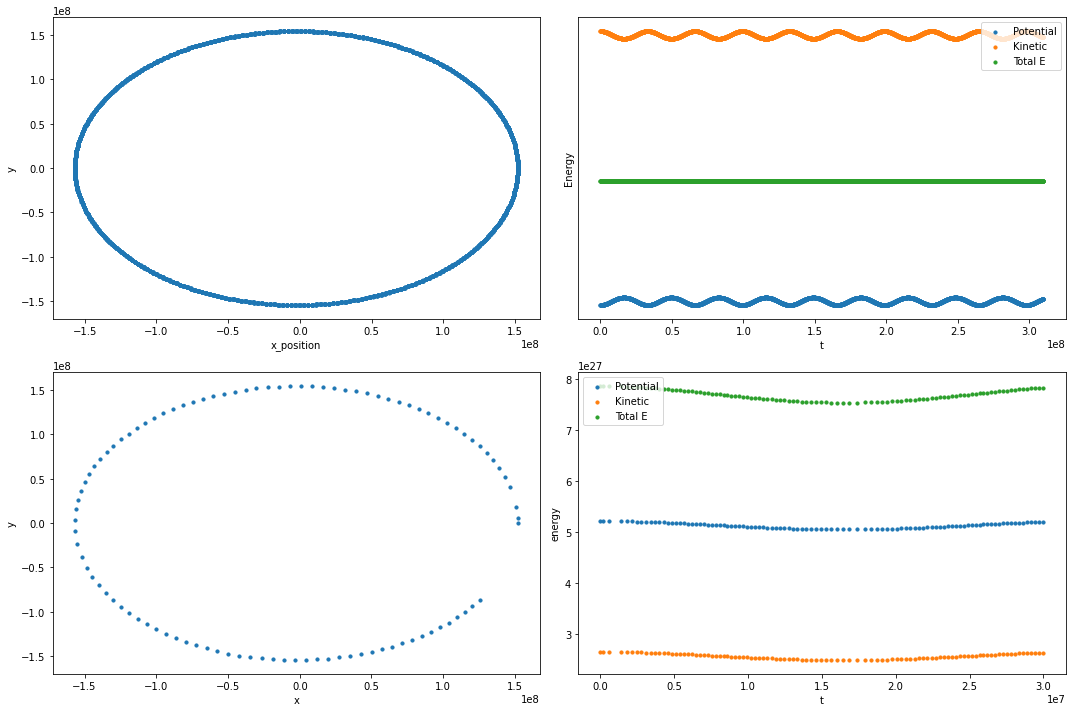

In [68]:
plt.figure(figsize=[15,10])
plt.subplot(2,2,1)
plt.scatter(r0[0], r0[2], s=10)
plt.xlabel('x_position')
plt.ylabel('y')
plt.subplot(2,2,2)

#위치에너지
U = -G*M*m/(r0[0]**2 + r0[2]**2)**0.5 
#운동에너지
K = 0.5*m*(r0[1]**2 + r0[3]**2) 

plt.scatter(T0, U, s=10, label='Potential')
plt.scatter(T0, K, s=10, label='Kinetic')
plt.scatter(T0, U+K, s=10, label='Total E')
plt.xlabel('t')
plt.ylabel('Energy')
plt.show()

In [ ]:
#plt.xlim([0, 2*1e7])
#plt.ylim([2*1e27, 3*1e27])
ax = plt.gca()

ax.axes.yaxis.set_ticks([])
plt.legend()

plt.subplot(2,2,3)
plt.scatter(r1[0], r1[2], s=10)
plt.xlabel('x') 
plt.ylabel('y')

plt.subplot(2,2,4)
U = G*M*m/(r1[0]**2 + r1[2]**2)**0.5
K = 0.5*m*(r1[1]**2 + r1[3]**2)
plt.scatter(T1, U, s=10, label='Potential')
plt.scatter(T1, K, s=10, label='Kinetic')
plt.scatter(T1, U+K, s=10, label='Total E')
plt.xlabel('t')
plt.ylabel('energy')
#plt.xlim([1.4*1e7, 1.8*1e7])
#plt.ylim([13*1e27, -2*1e27])
plt.legend()
      # X축의 범위: [xmin, xmax]

plt.tight_layout()